In [1]:
# import pyfolio as pf

In [12]:
import zipline

ModuleNotFoundError: No module named 'zipline'

In [13]:
import eikon as ek

ek.set_app_key('8ee143628de84818a8b12f4f55be35674e136d08')
df_eikon = ek.get_timeseries(["KRW="],
                             fields="*",
                             start_date="2015-01-01",
                             end_date = "2020-01-11",
                             interval = "daily"
                            )
df_eikon.tail(5)

C:\ProgramData\Anaconda3\lib\site-packages\eikon\time_series.py:282: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  datapoints = pd.np.array(timeseries['dataPoints'])
C:\ProgramData\Anaconda3\lib\site-packages\eikon\time_series.py:284: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  timestamps = pd.np.array([tz_replacer(value) for value in datapoints[:, timestamp_index]],
C:\ProgramData\Anaconda3\lib\site-packages\eikon\time_series.py:286: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  datapoints = pd.np.delete(datapoints, pd.np.s_[timestamp_index],
C:\ProgramData\Anaconda3\lib\site-packages\eikon\time_series.py:208: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import nu

KRW=,CLOSE,HIGH,LOW,OPEN,COUNT
Date,,,,,
2020-01-06,1166.94,1172.79,1164.86,1164.89,15970.0
2020-01-07,1167.30,1168.15,1162.70,1166.54,17433.0
2020-01-08,1162.25,1179.24,1160.00,1167.30,19098.0
2020-01-09,1158.72,1163.00,1157.34,1162.34,19513.0
2020-01-10,1157.97,1163.74,1157.09,1158.73,18662.0


In [3]:
def initialize(context):
    pass

In [4]:
from zipline.api import order, symbol
def handle_data(context, data):
    order(symbol('KRW'), 1)

In [5]:
data = df_eikon[['CLOSE']]
data.head()

KRW=,CLOSE
Date,
2015-01-01,1091.45
2015-01-02,1105.92
2015-01-05,1108.93
2015-01-06,1098.00
2015-01-07,1097.74


In [6]:
data.columns = ["KRW"]

In [7]:
data.head()

,KRW
Date,
2015-01-01,1091.45
2015-01-02,1105.92
2015-01-05,1108.93
2015-01-06,1098.00
2015-01-07,1097.74


In [8]:
data = data.tz_localize("UTC")
data.head()

,KRW
Date,
2015-01-01 00:00:00+00:00,1091.45
2015-01-02 00:00:00+00:00,1105.92
2015-01-05 00:00:00+00:00,1108.93
2015-01-06 00:00:00+00:00,1098.00
2015-01-07 00:00:00+00:00,1097.74


In [9]:
from zipline.algorithm import TradingAlgorithm
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)

In [10]:
result = algo.run(data)
result.head()

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,100000.000000,0.00,0.00,...,0.0,0.0,0,NaN,100000.000000,0.00,0.00,1,[],0.0
2015-01-05 21:00:00+00:00,0.000062,-0.000006,None,0.0,0.0,None,-1109.485465,98890.514535,1108.93,1108.93,...,0.0,0.0,0,-11.224972,100000.000000,0.00,0.00,2,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-06 21:00:00+00:00,0.001028,-0.000120,None,0.0,0.0,None,-1098.550000,97791.964535,2196.00,2196.00,...,0.0,0.0,0,-9.597381,98890.514535,1108.93,1108.93,3,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-07 21:00:00+00:00,0.000871,-0.000131,None,0.0,0.0,None,-1098.289870,96693.674665,3293.22,3293.22,...,0.0,0.0,0,-9.011536,97791.964535,2196.00,2196.00,4,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-08 21:00:00+00:00,0.000902,-0.000233,None,0.0,0.0,None,-1095.058255,95598.616410,4378.04,4378.04,...,0.0,0.0,0,-10.740800,96693.674665,3293.22,3293.22,5,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0


In [11]:
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [12]:
result.head()
# result.iplot(result.index, result.portfolio_value)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,100000.000000,0.00,0.00,...,0.0,0.0,0,NaN,100000.000000,0.00,0.00,1,[],0.0
2015-01-05 21:00:00+00:00,0.000062,-0.000006,None,0.0,0.0,None,-1109.485465,98890.514535,1108.93,1108.93,...,0.0,0.0,0,-11.224972,100000.000000,0.00,0.00,2,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-06 21:00:00+00:00,0.001028,-0.000120,None,0.0,0.0,None,-1098.550000,97791.964535,2196.00,2196.00,...,0.0,0.0,0,-9.597381,98890.514535,1108.93,1108.93,3,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-07 21:00:00+00:00,0.000871,-0.000131,None,0.0,0.0,None,-1098.289870,96693.674665,3293.22,3293.22,...,0.0,0.0,0,-9.011536,97791.964535,2196.00,2196.00,4,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0
2015-01-08 21:00:00+00:00,0.000902,-0.000233,None,0.0,0.0,None,-1095.058255,95598.616410,4378.04,4378.04,...,0.0,0.0,0,-10.740800,96693.674665,3293.22,3293.22,5,"[{'sid': Equity(0 [KRW]), 'amount': 1, 'commis...",0.0


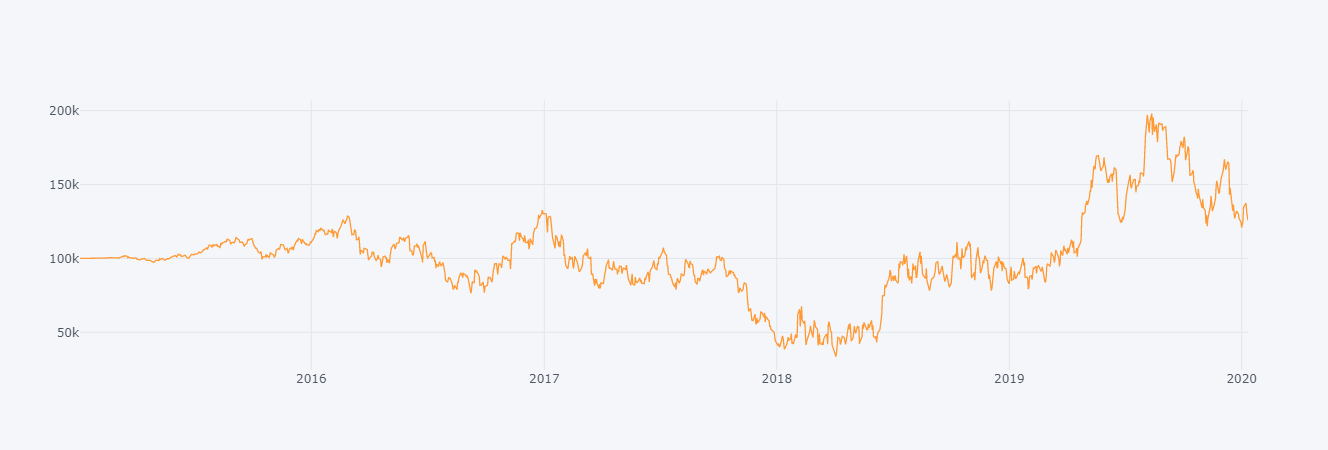

In [13]:
result.portfolio_value.iplot()

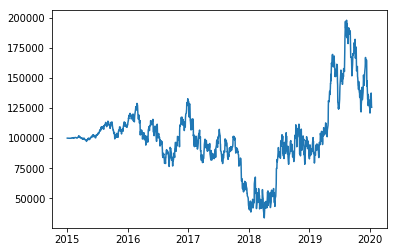

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(result.index, result.portfolio_value)
plt.show()

In [3]:
rs = df_eikon['CLOSE'].pct_change().fillna(0)

In [5]:
import pyfolio as pf

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader-0.8.1-py3.7.egg\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
c:\users\infomax\documents\github\pyfolio\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [6]:
pf.create_full_tear_sheet(rs)

Start date,2015-01-01
End date,2020-01-10
Total months,62
,Backtest
Annual return,1.143%
Cumulative returns,6.095%
Annual volatility,8.406%
Sharpe ratio,0.18
Calmar ratio,0.08
Stability,0.01
Max drawdown,-15.151%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

In [7]:
rs.shape

(1312,)

In [8]:
rs.head()

Date
2015-01-01    0.000000
2015-01-02    0.013258
2015-01-05    0.002722
2015-01-06   -0.009856
2015-01-07   -0.000237
Name: CLOSE, dtype: float64

In [9]:
type(rs)

pandas.core.series.Series